<a href="https://colab.research.google.com/github/williamshiaogit/DL-ML-AI-learning/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install face_recognition

In [ ]:
import os
import cv2
import glob
import json
import pickle
import numpy as np
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
root = '/content/drive/My Drive/machine-learning/project/'
tags_path = root + 'code/bert/mongo-database/tags_v4_remove_noise_tags_merge.json'
folder_path = root + '專題-人型人臉裁切/py執行/test01_cut_photos/*/*'
facenet_path = root + 'code/facenet/facenet.h5'
train_df_path = root + 'code/facenet/train_df_tags_merge.pickle'
data_path = root + 'code/data.json'

In [ ]:
# # 把圖片路徑與標籤對應起來，整理成 dataframe
# def load_datas(data_path,folder_path):
  
# 載入所有的圖檔
folders = glob.glob(folder_path)

In [ ]:
folders

In [ ]:
# 載入包含 tags 的 json 檔
with open( data_path ) as json_file:
    datas = json.load(json_file)

In [ ]:
# 從「已經被切出身體的照片」中再找出臉部的 vector，update json
for index, data in enumerate(datas[:1000]):

    print(index)

    # if index<1000:
    #     print('先跳過，之後從 1000 跟 2000 的補上')
    #     continue

    datas[index]['face_vector'] = {}
    for file in folders: 
        # 這裡的 file 是指切好身體的圖片
        # 若 file 的資料夾名跟 json 的 slug 一樣
        # 就可以把 file 裡面的臉抓到向量，並指定迴 json 裡 
        if file.split('/')[-2] == data['slug'].replace('.','_'):
            try:
                # 因為可能會有多張臉，所以 encodings 是一個陣列
                img = face_recognition.load_image_file(file)            
                ens = face_recognition.face_encodings(img)

                # 如果真的有臉，要知道是哪一張圖有臉，所以要拿 file path 回去 datas imgs 陣列裡面比對
                if ens:
                    
                    img_path = ''
                    for img in datas[index]['imgs']:
                        if img.find(file.split('/')[-1]) != -1:
                            img_path = img

                    if img_path:
                        en = list(ens[0]) # 給第一張臉                
                        datas[index]['face_vector'][img_path] = en     
            except:
                print('cannot identify image file')
            # else:
                # print('沒有偵測到臉')
    # print(datas[index]['face_vector'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
datas[:1]

In [ ]:
# 存入 json
with open( root+'code/data_add_face_vector_1000_update.json','w' ) as outfile:
  json.dump(datas, outfile, ensure_ascii=False)

In [ ]:
with open( root+'code/data_add_face_vector.json','r' ) as outfile:
    z = json.load(outfile)
z

In [ ]:
# encodings 是一個陣列裡面有多個 128 維度的 numpy

t,s,vct=[],[],[]
for b in z:
    print(b['title'])
    print(b['slug'])
    for v in b['face_vector']:
        # print(v)
        t.append(b['title'])
        s.append(b['slug'])
        vct.append(v)
df = pd.DataFrame([t,s,vct]).T
df

[廣告] 夏本あさみ 性感小惡魔
M.1596101351.A.7C3
[正妹] 宅女生活
M.1596100012.A.457


,0,1,2
0,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.056454770267009735, 0.06873108446598053, 0..."
1,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.0795304924249649, 0.07383853942155838, -0...."
2,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.025636116042733192, 0.07679309695959091, 0..."
3,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[0.024851912632584572, 0.08144613355398178, 0...."
4,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.09775223582983017, 0.10049962997436523, 0...."
5,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.05489387363195419, 0.09997168928384781, 0...."
6,[廣告] 夏本あさみ 性感小惡魔,M.1596101351.A.7C3,"[-0.08457304537296295, 0.11035677045583725, -0..."


跟 M.1596101351.A.7C3 的距離是: 0.6290122002846741
跟 M.1596101351.A.7C3 的距離是: 0.5966996752137016
跟 M.1596101351.A.7C3 的距離是: 0.5459316614146617
跟 M.1596101351.A.7C3 的距離是: 0.6185114697564388
跟 M.1596101351.A.7C3 的距離是: 0.6100532310206147
跟 M.1596101351.A.7C3 的距離是: 0.624343436064343
跟 M.1596101351.A.7C3 的距離是: 0.554358758941405
2
這個最像:
[廣告] 夏本あさみ 性感小惡魔

原圖


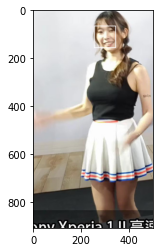

In [ ]:
slug, img = train_x['slug'][0], train_x['imgs'][0]
path = '/content/drive/My Drive/machine-learning/project/專題-人型人臉裁切/py執行/test01_cut_photos/'
path = os.path.join(os.path.join(path,slug),img)
img = face_recognition.load_image_file(path)

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, np.array([np.array(x) for x in df[2]]) )
    for d, n in zip(distances, df[1]):
        print("跟", n, "的距離是:", d)
    print(distances.argmin())

    print("這個最像:")
    print(df[0][distances.argmin()])
    # plt.imshow(face_recognition.load_image_file(paths[distances.argmin()]))
    # plt.show()

print()
print("原圖")
plt.imshow(img)
plt.show()

跟 M_1588156185_A_AD8 的距離是: 0.6732428162259685
跟 M_1583596322_A_975 的距離是: 0.7969334169836622
跟 M_1580016339_A_4E7 的距離是: 0.7107132047445683
跟 M_1594999184_A_CBB 的距離是: 0.7457034216106334
跟 M_1586253019_A_FE8 的距離是: 1.315091245948076
0
這個最像:
M_1588156185_A_AD8


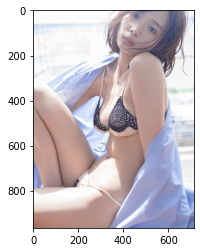


原圖


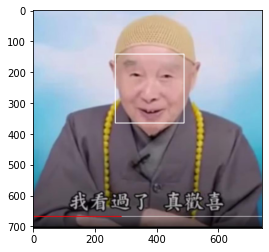

In [ ]:
### 只是想說
img = face_recognition.load_image_file('/content/drive/My Drive/machine-learning/project/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595487008_A_521/XapCQ2q.png.jpg')

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, slugs):
        print("跟", n, "的距離是:", d)
    print(distances.argmin())

    print("這個最像:")
    print(slugs[distances.argmin()])
    plt.imshow(face_recognition.load_image_file(paths[distances.argmin()]))
    plt.show()

print()
print("原圖")
plt.imshow(img)
plt.show()